In [34]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import stat
from scipy.stats import iqr

In [35]:
#read the data sets with display the data
df=pd.read_csv(r"D:\clean_dataset.csv")
df

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,0,0,Education,Black,1.25,0,0,0,0,ByBirth,260,0,0
686,0,22.67,0.750,1,1,Energy,White,2.00,0,1,2,1,ByBirth,200,394,0
687,0,25.25,13.500,0,0,Healthcare,Latino,2.00,0,1,1,1,ByBirth,200,1,0
688,1,17.92,0.205,1,1,ConsumerStaples,White,0.04,0,0,0,0,ByBirth,280,750,0


In [36]:
#check the datasets information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


In [37]:
#check the any null values in the datasets
df.isnull().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
Industry          0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

In [38]:
#check the mean,mode details
df.describe()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income,Approved
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000
mean,0.695652,31.514116,4.758725,0.760870,0.763768,2.223406,0.523188,0.427536,2.40000,0.457971,180.547826,1017.385507,0.444928
std,0.460464,11.860245,4.978163,0.426862,0.425074,3.346513,0.499824,0.495080,4.86294,0.498592,173.970323,5210.102598,0.497318
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,1.000000,1.000000,0.165000,0.000000,0.000000,0.00000,0.000000,60.000000,0.000000,0.000000
50%,1.000000,28.460000,2.750000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,160.000000,5.000000,0.000000
75%,1.000000,37.707500,7.207500,1.000000,1.000000,2.625000,1.000000,1.000000,3.00000,1.000000,272.000000,395.500000,1.000000
max,1.000000,80.250000,28.000000,1.000000,1.000000,28.500000,1.000000,1.000000,67.00000,1.000000,2000.000000,100000.000000,1.000000


In [39]:
#check the value counts for each parameters
for i in df:
    print(df[i].value_counts())

1    480
0    210
Name: Gender, dtype: int64
28.46    12
22.67     9
20.42     7
18.83     6
24.50     6
         ..
48.25     1
28.33     1
18.75     1
18.50     1
36.42     1
Name: Age, Length: 350, dtype: int64
1.500     21
0.000     19
3.000     19
2.500     19
0.750     16
          ..
0.085      1
12.250     1
11.045     1
11.125     1
3.375      1
Name: Debt, Length: 215, dtype: int64
1    525
0    165
Name: Married, dtype: int64
1    527
0    163
Name: BankCustomer, dtype: int64
Energy                   146
Materials                 78
Industrials               64
ConsumerDiscretionary     59
ConsumerStaples           54
Healthcare                53
Financials                51
InformationTechnology     41
CommunicationServices     38
Utilities                 38
Real Estate               30
Education                 25
Research                  10
Transport                  3
Name: Industry, dtype: int64
White     408
Black     138
Asian      59
Latino     57
Other      28
Nam

First will select the categorical type data for chi2_suare_test,here categorical type means "object type", "yes/no"
lets check the categorical data and create the seperate list.

In [40]:
#create the list of categorical type variables
category=['Gender','Married','BankCustomer','Industry','Ethnicity','PriorDefault','Employed',
          'DriversLicense','Citizen','ZipCode','Approved']

In [41]:
df.loc[:,category]

,Gender,Married,BankCustomer,Industry,Ethnicity,PriorDefault,Employed,DriversLicense,Citizen,ZipCode,Approved
0,1,1,1,Industrials,White,1,1,0,ByBirth,202,1
1,0,1,1,Materials,Black,1,1,0,ByBirth,43,1
2,0,1,1,Materials,Black,1,0,0,ByBirth,280,1
3,1,1,1,Industrials,White,1,1,1,ByBirth,100,1
4,1,1,1,Industrials,White,1,0,0,ByOtherMeans,120,1
...,...,...,...,...,...,...,...,...,...,...,...
685,1,0,0,Education,Black,0,0,0,ByBirth,260,0
686,0,1,1,Energy,White,0,1,1,ByBirth,200,0
687,0,0,0,Healthcare,Latino,0,1,1,ByBirth,200,0
688,1,1,1,ConsumerStaples,White,0,0,0,ByBirth,280,0


# Statistical Testing using Chisquare:

In [42]:
import colorama 
from colorama import Fore

Gender:


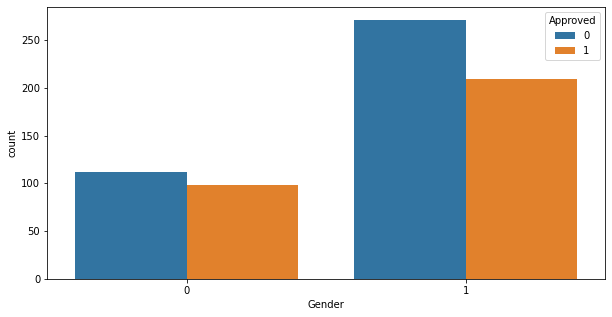

'Gender'is a 'bad Predictor'
p_val=0.44723087514133186

Married:


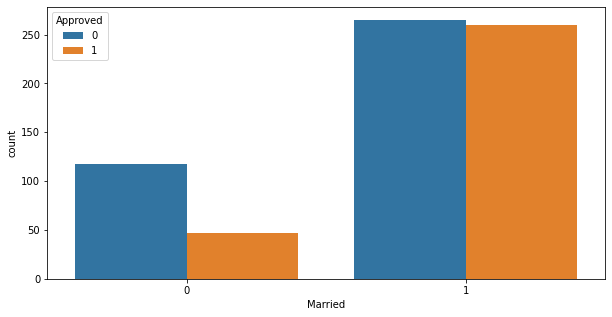

'Married' is a Good Predictor
p_val=2.100231920165588e-06

BankCustomer:


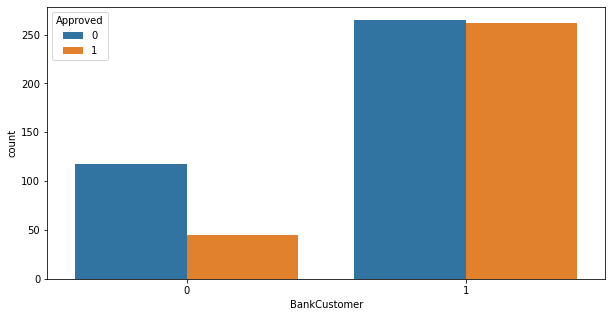

'BankCustomer' is a Good Predictor
p_val=6.91661320541803e-07

Industry:


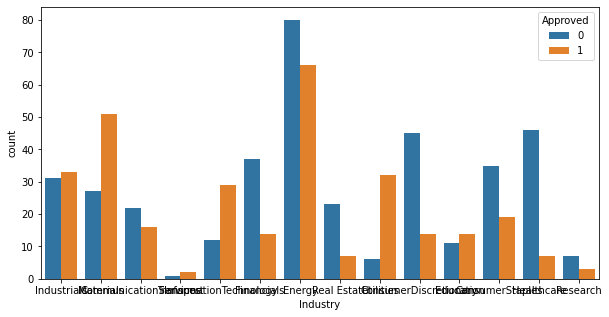

'Industry' is a Good Predictor
p_val=3.502987066102042e-15

Ethnicity:


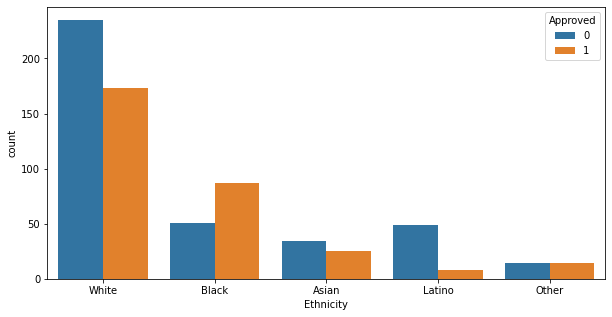

'Ethnicity' is a Good Predictor
p_val=1.823665654934685e-08

PriorDefault:


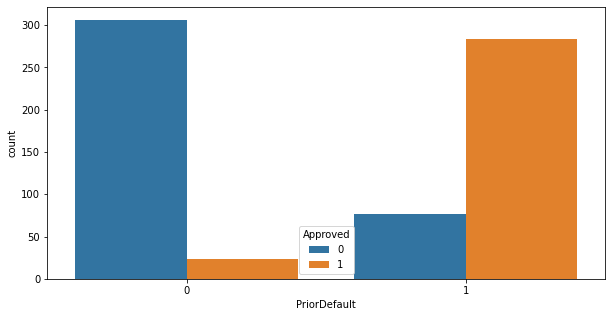

'PriorDefault' is a Good Predictor
p_val=7.298530125411298e-80

Employed:


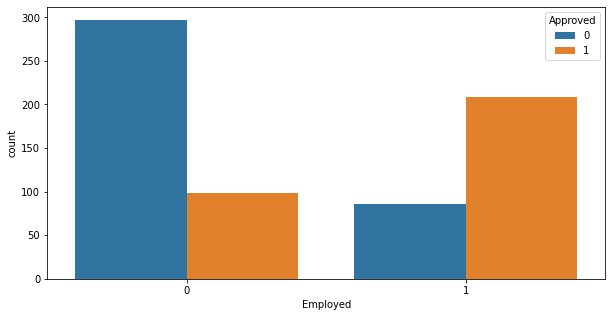

'Employed' is a Good Predictor
p_val=2.227269345312281e-33

DriversLicense:


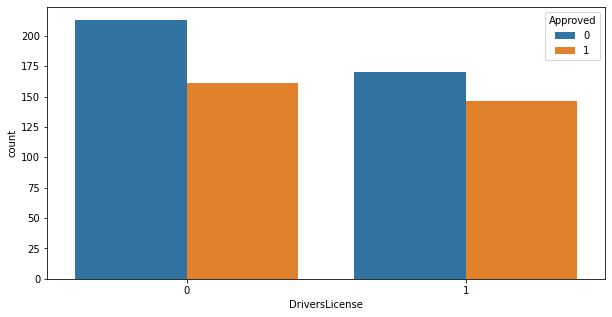

'DriversLicense'is a 'bad Predictor'
p_val=0.4061341323141693

Citizen:


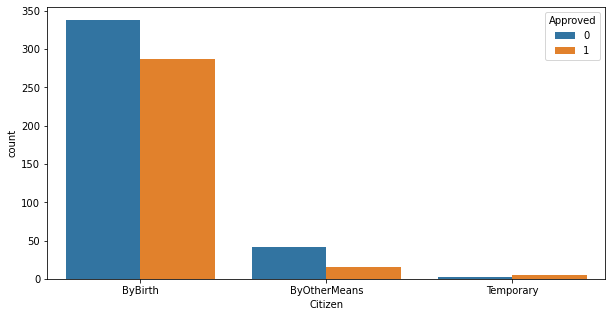

'Citizen' is a Good Predictor
p_val=0.010094291370456362

ZipCode:


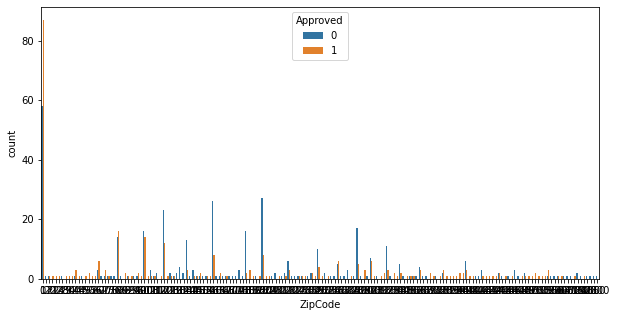

'ZipCode' is a Good Predictor
p_val=0.006354824252183887

Approved:


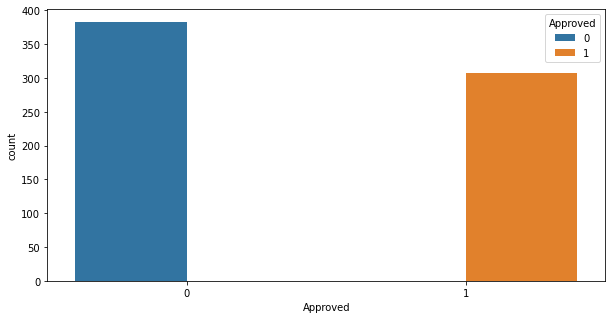

'Approved' is a Good Predictor
p_val=4.469841378183071e-152



In [43]:
for i in category:
    print(i+":")
    plt.figure(figsize=(10,5))
    sns.countplot(x=i,data=df,hue="Approved")
    plt.show()
    a=np.array(pd.crosstab(df.Approved,df[i]))
    (stats,p,dof,_)=chi2_contingency(a,correction=False)
    if p>0.05:
        print(Fore.RED + "'{}'is a 'bad Predictor'".format(i))
        print('p_val={}\n'.format(p))
    else:
        print(Fore.GREEN + "'{}' is a Good Predictor".format(i))
        print('p_val={}\n'.format(p))

# Gender:
"we see that majority of credit card holders are males "
"since Gender is a bad predictor towards Approval we drop the attribute"

In [44]:
df.drop(['Gender'],1,inplace=True)

C:\Users\SMFL-20531\AppData\Local\Temp\ipykernel_14400\2126209942.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Gender'],1,inplace=True)


# Married:
"we see that majority of credit card holders are Married "

# BankCustomer:
"we see that majority of credit card holders are BankCustomers only "
"we see that BankCustomers have equal probability of getting approval to not getting approval of credit card "
"If the Applicant is not BankCustomers then he/she has higher probability of getting approval of credit card "

# Industry:
"we see that majority of credit card holders are people working in Energy sector "
"There is Heigh Probability of credit card approval if he/she working in HealthCare sector"

# Ethnicity:
"we see that people belonging to White ethnicity use credit card majorly "

# PriorDefault:
"we see that people with no defaults have high probability of creditcard approval "
"we see that people with payment defaults have less probability of creditcard approval "

# DriversLicense:
"we see that majority of credit card holders have DrivingLicense"
"since DriversLicense is a bad predictor towards Approval we drop the attribute"

In [45]:
df.drop(['DriversLicense'],1,inplace=True)

C:\Users\SMFL-20531\AppData\Local\Temp\ipykernel_14400\2114335881.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['DriversLicense'],1,inplace=True)


# Citizen:
"we see that majority of credit card holders have Citizenship bybirth"

# Continious type of variable:

In [46]:
column_names=df.columns.tolist()
continious=list(set(column_names)-set(category))

In [47]:
continious

['Income', 'Age', 'YearsEmployed', 'CreditScore', 'Debt']

In [48]:
df.loc[:,continious]

,Income,Age,YearsEmployed,CreditScore,Debt
0,0,30.83,1.25,1,0.000
1,560,58.67,3.04,6,4.460
2,824,24.50,1.50,0,0.500
3,3,27.83,3.75,5,1.540
4,0,20.17,1.71,0,5.625
...,...,...,...,...,...
685,0,21.08,1.25,0,10.085
686,394,22.67,2.00,2,0.750
687,1,25.25,2.00,1,13.500
688,750,17.92,0.04,0,0.205


Income:


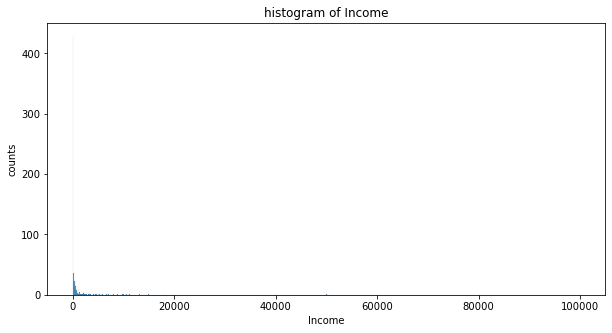

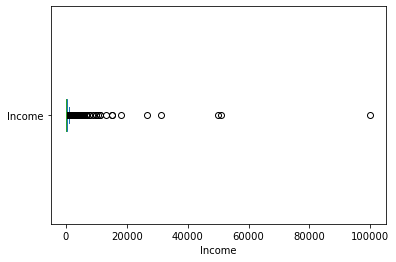

Age:


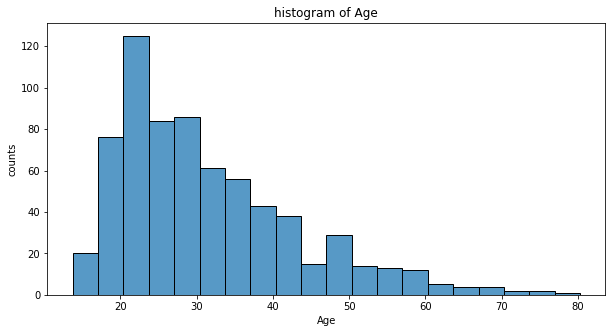

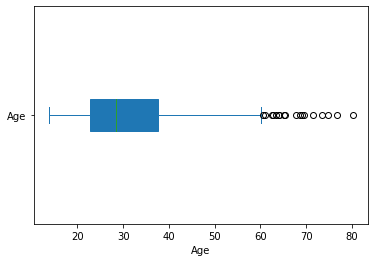

YearsEmployed:


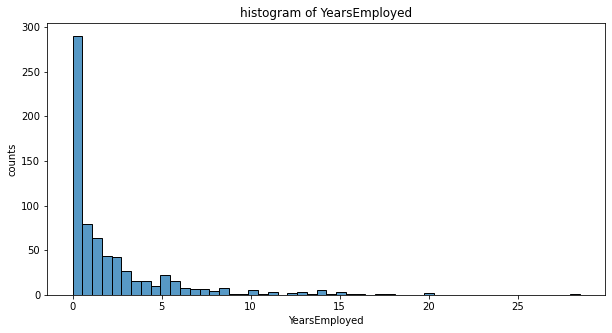

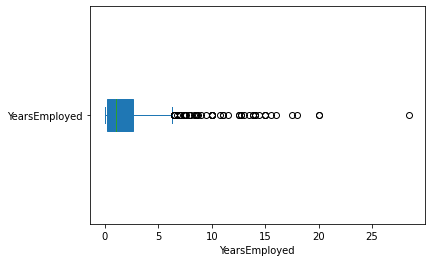

CreditScore:


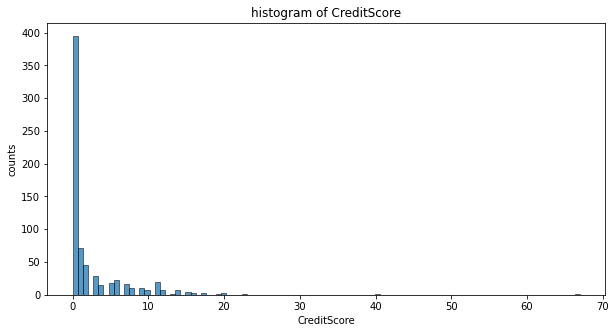

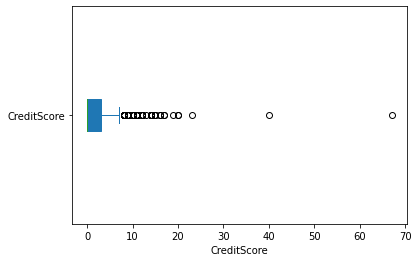

Debt:


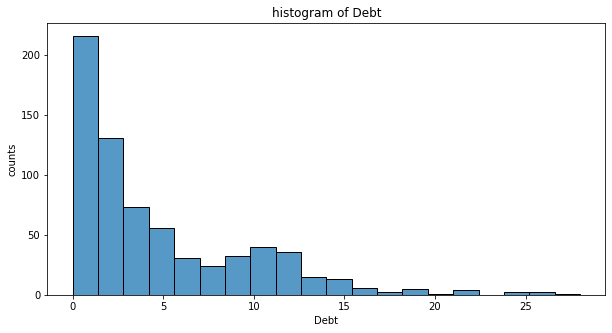

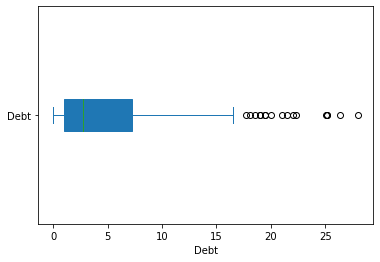

In [49]:
for i in continious:
    print(i+':')
    plt.figure(figsize=(10,5))
    sns.histplot(df[i])
    plt.xlabel(i)
    plt.ylabel('counts')
    plt.title('histogram of ' + i)
    plt.show()
    df[i].plot.box(vert=False,patch_artist=True)
    plt.xlabel(i)
    plt.show()

# Treating Outliers:

In [50]:
iqr=iqr

Income:


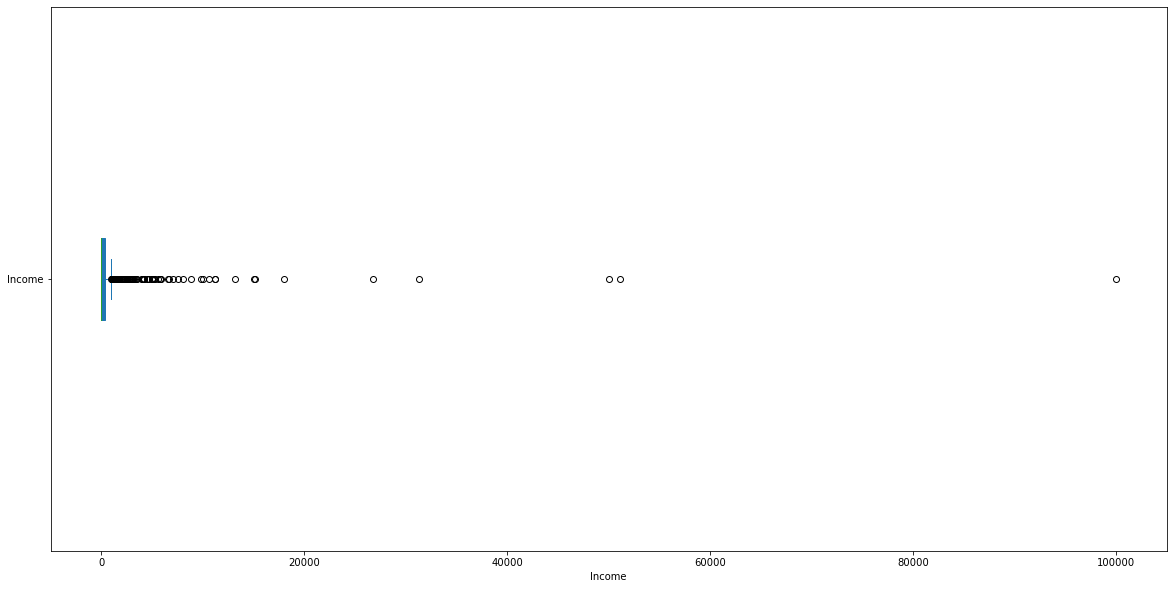

Left Limit:-593.25
Right Limit:988.75
iqr:395.5
if left outlier type 'left' else 'right' else 'both' if no outliers then type 'no'right
by what number do you want to replace395.5


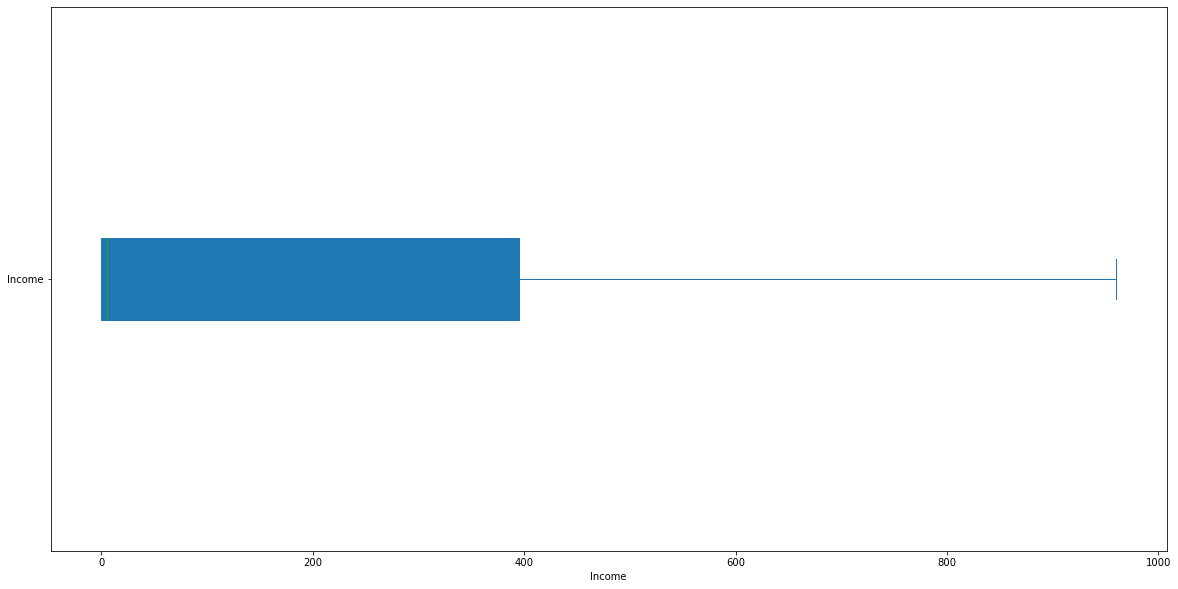

Age:


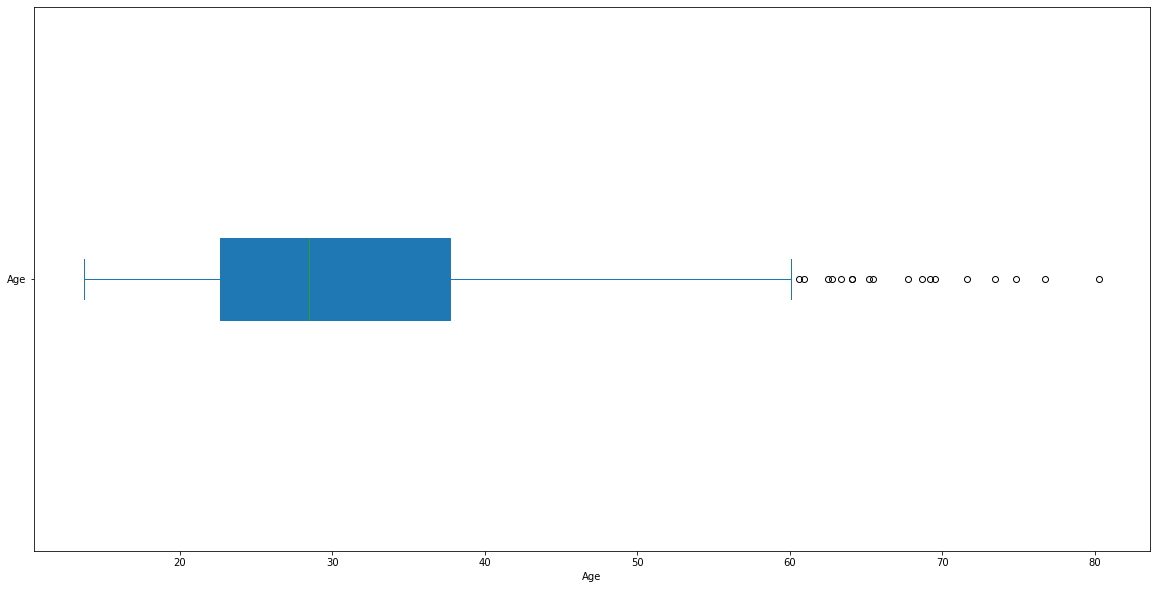

Left Limit:0.11375000000001023
Right Limit:60.26374999999999
iqr:15.037499999999994
if left outlier type 'left' else 'right' else 'both' if no outliers then type 'no'right
by what number do you want to replace15.03


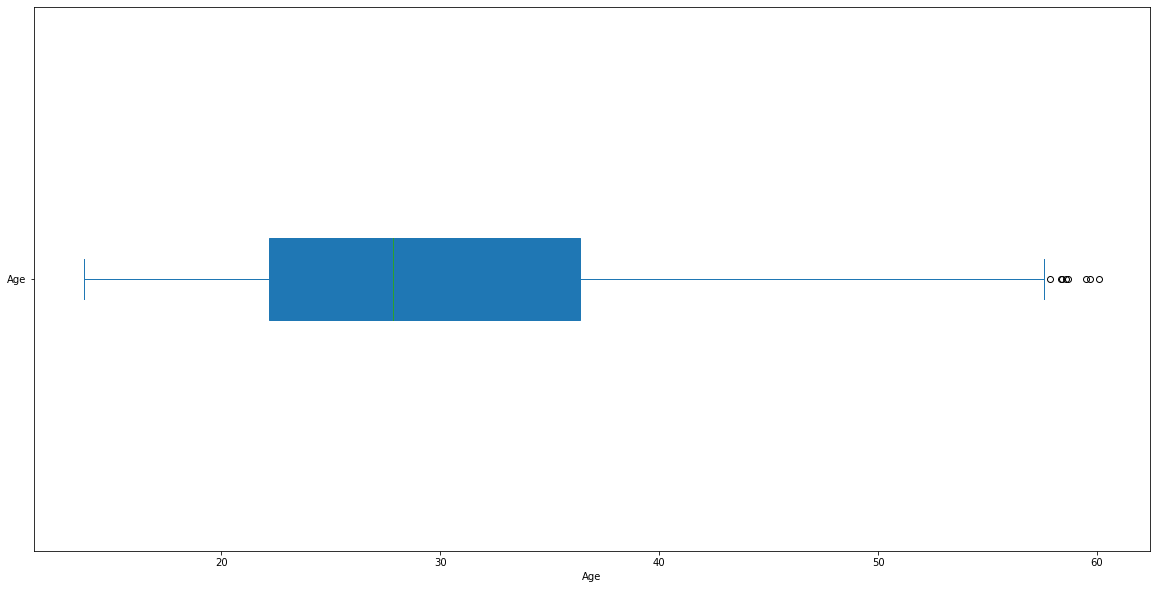

YearsEmployed:


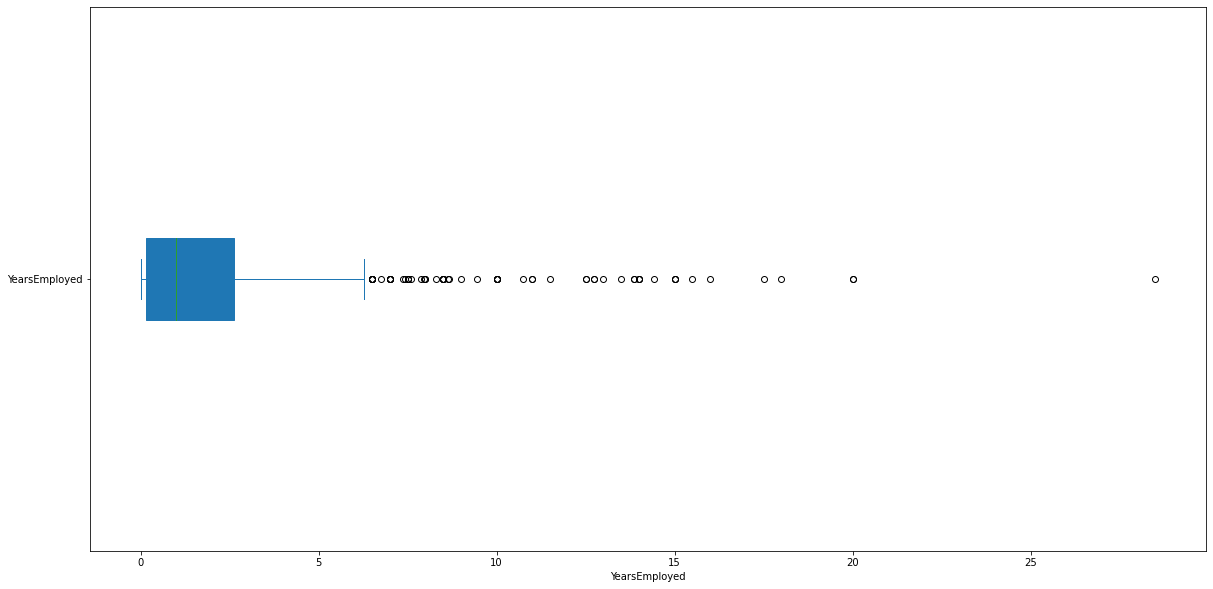

Left Limit:-3.525
Right Limit:6.3149999999999995
iqr:2.46
if left outlier type 'left' else 'right' else 'both' if no outliers then type 'no'right
by what number do you want to replace2.46


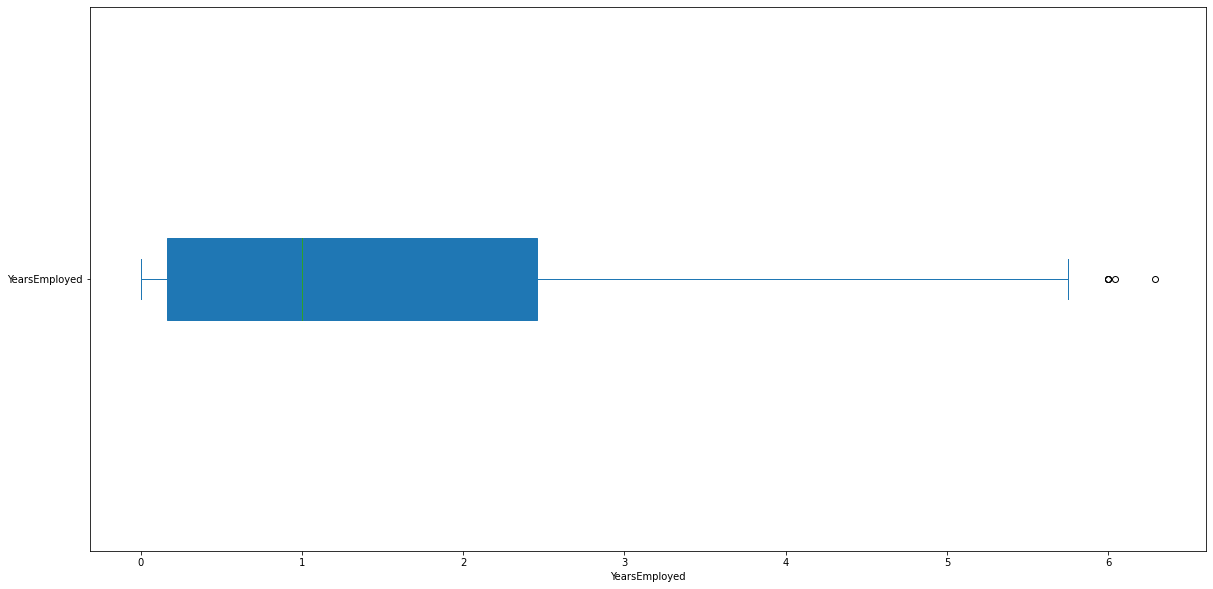

CreditScore:


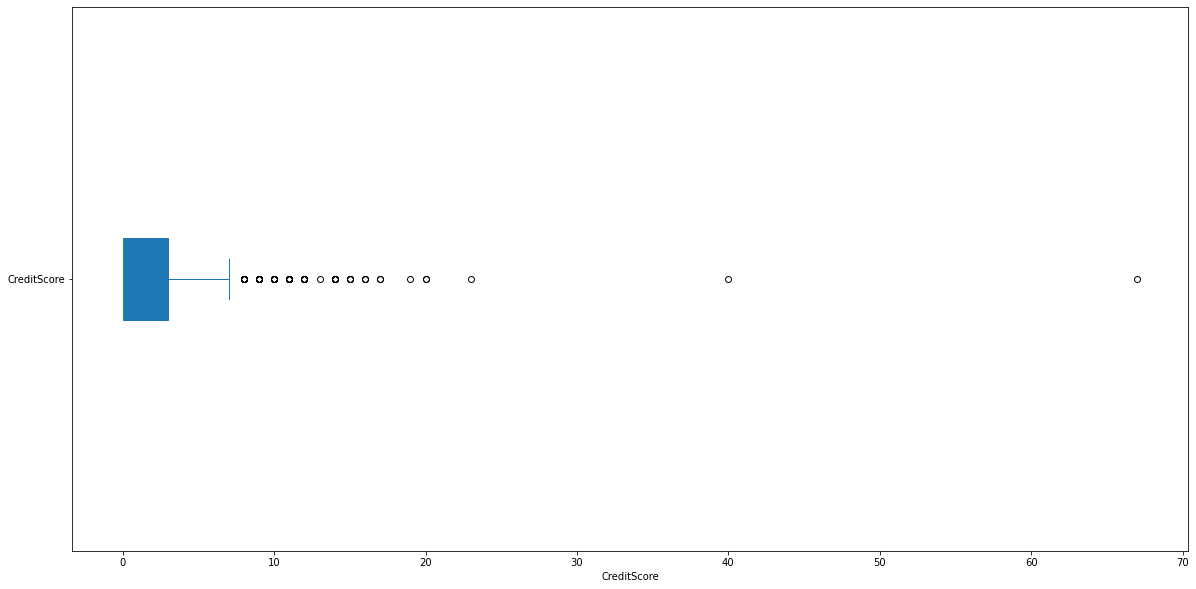

Left Limit:-4.5
Right Limit:7.5
iqr:3.0
if left outlier type 'left' else 'right' else 'both' if no outliers then type 'no'right
by what number do you want to replace3.0


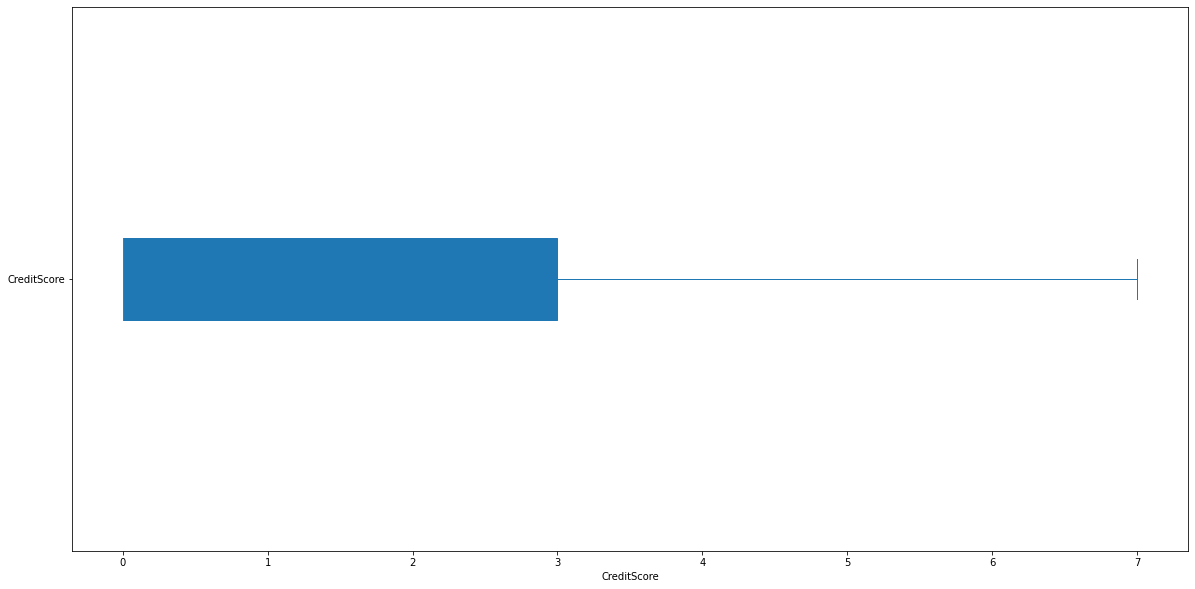

Debt:


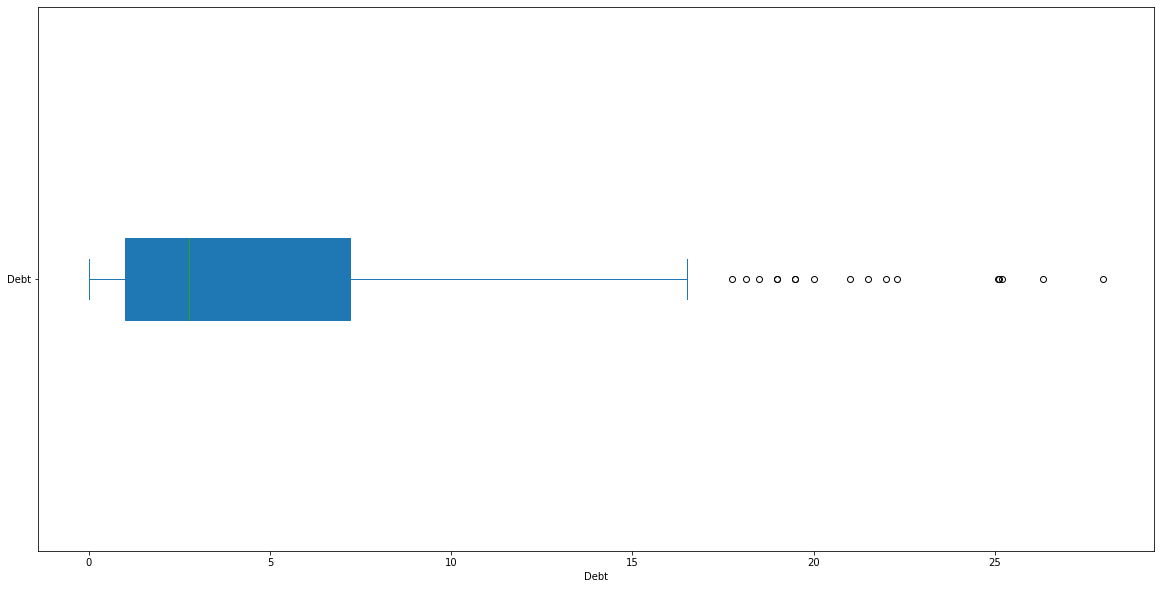

Left Limit:-8.31125
Right Limit:16.518749999999997
iqr:6.2075
if left outlier type 'left' else 'right' else 'both' if no outliers then type 'no'right
by what number do you want to replace6.2075


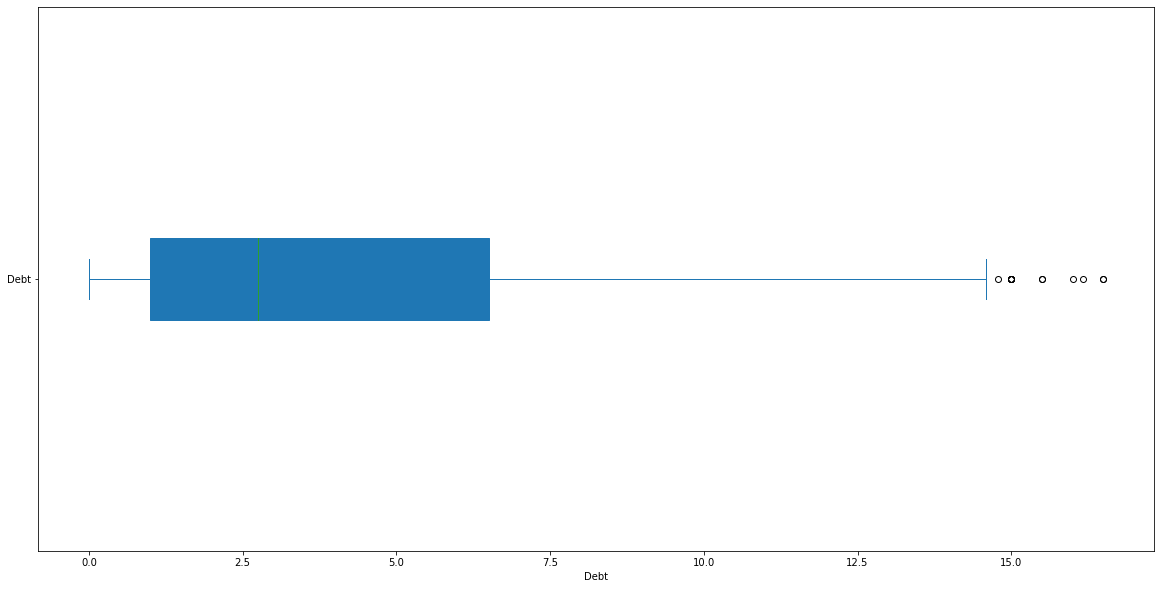

In [51]:
for i in continious:
    print(i+":")
    plt.figure(figsize=(20,10))
    df[i].plot.box(vert=False,patch_artist=True)
    plt.xlabel(i)
    plt.show()
    
    iqr=df[i].describe()['75%']-df[i].describe()['25%']
    right_lim=df[i].quantile(0.75)+1.5*iqr
    left_lim=df[i].quantile(0.25)-1.5*iqr
    print('Left Limit:{}'.format(left_lim))
    print('Right Limit:{}'.format(right_lim))
    print('iqr:{}'.format(iqr))
    
    a=input("if left outlier type 'left' else 'right' else 'both' if no outliers then type 'no'")
    a=a.lower()
    if a=='left':
        lo=float(input('by what number do you want to replace'))
        df[i]=[lo if val<left_lim else val for val in df[i]]
    elif a=='right':
        ro=float(input('by what number do you want to replace'))
        df[i]=[ro if val>right_lim else val for val in df[i]]
    elif a=='both':
        lo=float(input('by what number do you want to replace'))
        ro=float(input('by what number do you want to replace'))
        df[i]=[ro if val>right_lim else val for val in df[i]]
        df[i]=[lo if val<left_lim else val for val in df[i]]
    elif a=='no':
        pass
    plt.figure(figsize=(20,10))
    df[i].plot.box(vert=False,patch_artist=True)
    plt.xlabel(i)
    plt.show()

Income:


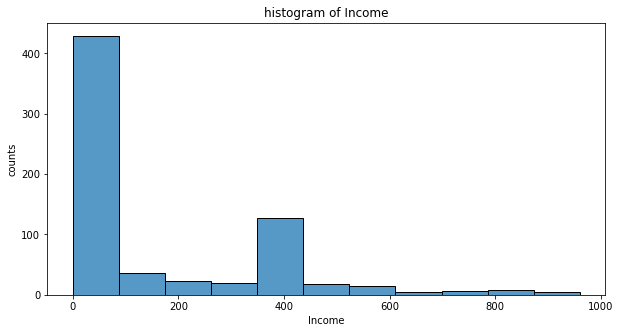

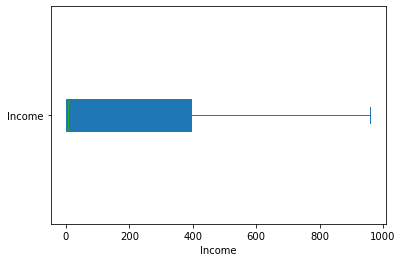

Age:


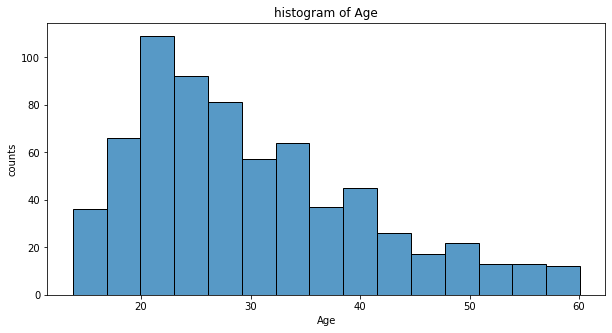

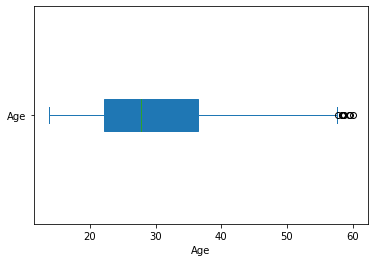

YearsEmployed:


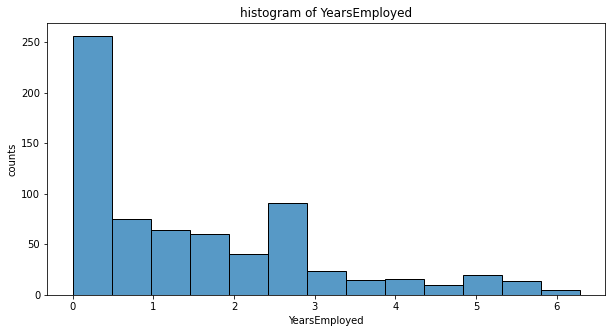

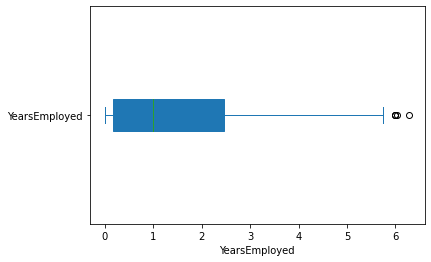

CreditScore:


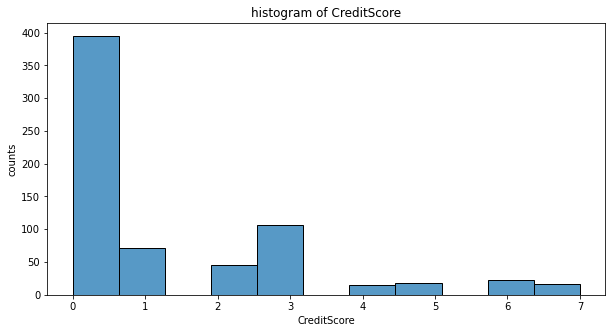

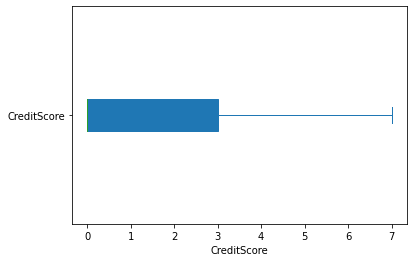

Debt:


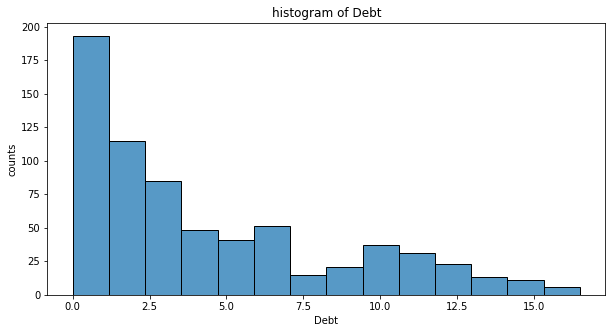

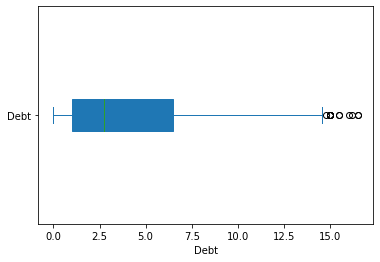

In [53]:
for i in continious:
    print(i+":")
    plt.figure(figsize=(10,5))
    sns.histplot(df[i])
    plt.xlabel(i)
    plt.ylabel('counts')
    plt.title('histogram of '+i)
    plt.show()
    df[i].plot.box(vert=False,patch_artist=True)
    plt.xlabel(i)
    plt.show()

Income:


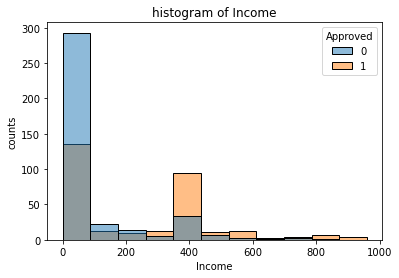

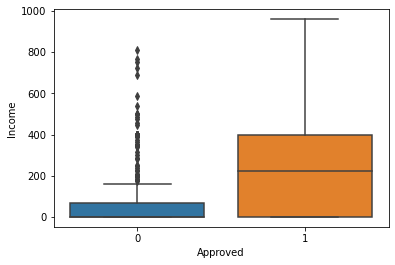

Age:


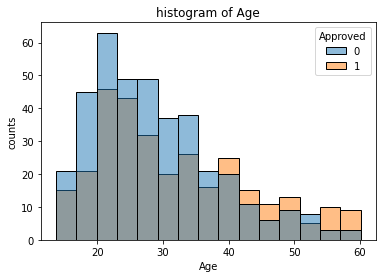

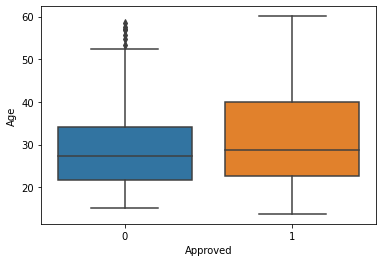

YearsEmployed:


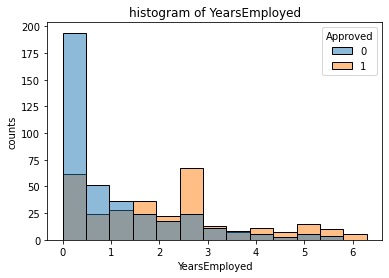

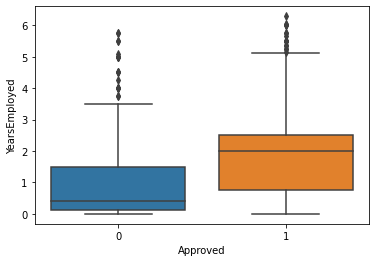

CreditScore:


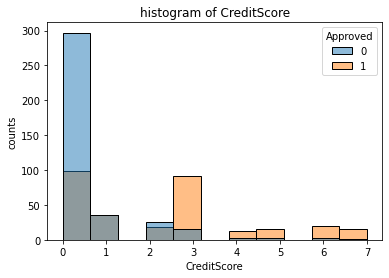

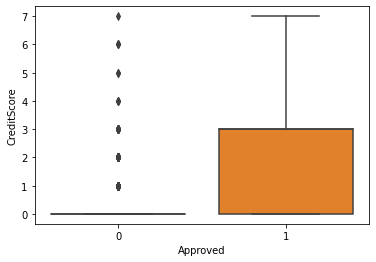

Debt:


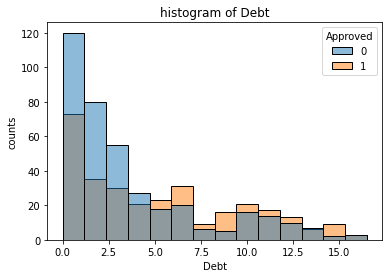

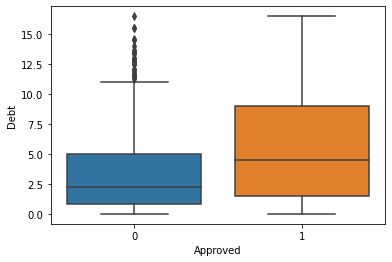

In [54]:
for i in continious:
    print(i+":")
    sns.histplot(x=df[i],hue=df.Approved)
    plt.xlabel(i)
    plt.ylabel('counts')
    plt.title('histogram of '+ i)
    plt.show()
    sns.boxplot(y=df[i],x=df.Approved)
    plt.show()

# Statistical Testing using Anova:

In [57]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols
import statsmodels.api as smf

In [58]:
for i in continious:
    print("-------------------------------------------------------------------------------------------------------------------")
    print(i+":\n")
    print('ANOVA:\n')
    mod=ols(i+'~Approved',data=df).fit()
    aov_table=smf.stats.anova_lm(mod,type = 2)
    print(aov_table,'\n')
    print('Pvalue={}\n'.format(aov_table['PR(>F)'][0]))
    p=aov_table['PR(>F)'][0]

    if p>0.05:
        print(Fore.RED +"'{}' is a 'bad Predictor'\n".format(i))
        print('Avg of this feature is same for both card approved group and not approved group\n')
        print("p_val = {}\n".format(p))
    else:
        print('TUKEY:\n')
        print(Fore.RED +"'{}' is a 'good Predictor'\n".format(i))
        print('Avg of this feature is not same for both card approved group and not approved group\n')
        print('we need to perform Tuckey as atleast one category is different\n')
        print(Fore.GREEN +"'{}' is a 'good Predictor'\n".format(i))
        tukey=pairwise_tukeyhsd(df[i],df.Approved,alpha=0.05)
        print(tukey,'\n')

-------------------------------------------------------------------------------------------------------------------
Income:

ANOVA:

             df        sum_sq       mean_sq           F        PR(>F)
Approved    1.0  4.161531e+06  4.161531e+06  104.814081  5.417547e-23
Residual  688.0  2.731631e+07  3.970393e+04         NaN           NaN 

Pvalue=5.4175472814508e-23

TUKEY:

'Income' is a 'good Predictor'

Avg of this feature is not same for both card approved group and not approved group

we need to perform Tuckey as atleast one category is different

'Income' is a 'good Predictor'

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
     0      1 156.2725  -0.0 126.3026 186.2424   True
----------------------------------------------------- 

-------------------------------------------------------------------------------------------------------------------
Age:

ANOVA:

    

In [59]:
df_industry = pd.get_dummies(df['Industry'], drop_first=True, prefix = "Industry")

In [61]:
df=pd.concat([df,df_industry],axis=1)

In [63]:
del df['Industry']

In [65]:
df_ethnicity = pd.get_dummies(df['Ethnicity'], drop_first=True, prefix = "Ethnicity")

In [67]:
df=pd.concat([df,df_ethnicity],axis=1)

In [68]:
del df['Ethnicity']

In [69]:
df_citizen = pd.get_dummies(df['Citizen'], drop_first=True, prefix = "Citizen")

In [71]:
df=pd.concat([df,df_citizen],axis=1)

In [74]:
del df['Citizen']

In [75]:
df.head()

,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,ZipCode,Income,...,Industry_Real Estate,Industry_Research,Industry_Transport,Industry_Utilities,Ethnicity_Black,Ethnicity_Latino,Ethnicity_Other,Ethnicity_White,Citizen_ByOtherMeans,Citizen_Temporary
0,30.83,0.000,1,1,1.25,1,1,1.0,202,0.0,...,0,0,0,0,0,0,0,1,0,0
1,58.67,4.460,1,1,3.04,1,1,6.0,43,560.0,...,0,0,0,0,1,0,0,0,0,0
2,24.50,0.500,1,1,1.50,1,0,0.0,280,824.0,...,0,0,0,0,1,0,0,0,0,0
3,27.83,1.540,1,1,3.75,1,1,5.0,100,3.0,...,0,0,0,0,0,0,0,1,0,0
4,20.17,5.625,1,1,1.71,1,0,0.0,120,0.0,...,0,0,0,0,0,0,0,1,1,0


# VIF Calculation

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [77]:
x = df[['Age','Debt','YearsEmployed','CreditScore','Income']]

In [78]:
x

,Age,Debt,YearsEmployed,CreditScore,Income
0,30.83,0.000,1.25,1.0,0.0
1,58.67,4.460,3.04,6.0,560.0
2,24.50,0.500,1.50,0.0,824.0
3,27.83,1.540,3.75,5.0,3.0
4,20.17,5.625,1.71,0.0,0.0
...,...,...,...,...,...
685,21.08,10.085,1.25,0.0,0.0
686,22.67,0.750,2.00,2.0,394.0
687,25.25,13.500,2.00,1.0,1.0
688,17.92,0.205,0.04,0.0,750.0


In [79]:
vif_data=pd.DataFrame()

In [81]:
vif_data['features']=x.columns

In [84]:
vif_data['VIF']=[variance_inflation_factor(x.values,i) for i in range (len(x.columns))]

In [85]:
vif_data

,features,VIF
0,Age,2.828930
1,Debt,2.054744
2,YearsEmployed,2.298794
3,CreditScore,1.817621
4,Income,1.680393


# Creating model

In [86]:
x=df.iloc[:,df.columns != 'Approved']

In [88]:
y=df.iloc[:,df.columns == 'Approved']

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=123)

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
model=LogisticRegression(solver='liblinear',random_state=123)

In [94]:
clf=model.fit(x_train,y_train)

C:\Conda dist\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [95]:
y_pred=clf.predict(x_test)

In [96]:
clf.score(x_test,y_test)

0.8599033816425121

In [97]:
clf.intercept_

array([-2.08619225])

In [98]:
clf.coef_

array([[-0.01793299, -0.02983195,  0.01303626,  0.58230414,  0.27553144,
         2.93605989,  0.28787561,  0.19055028, -0.00326723,  0.00294504,
        -1.30864209, -0.51328852,  0.38796879, -0.13284517, -0.64602139,
        -0.99670274,  0.05582364,  1.29475446, -0.05681709, -0.69727162,
        -0.25373214,  0.06279072,  0.89018486,  0.08004152, -0.22185161,
        -0.14085112, -0.37031655,  0.56010133,  1.01904202]])

# Creating confusion matrix

In [99]:
from sklearn import metrics

In [103]:
cm=metrics.confusion_matrix(y_test,y_pred)
print(cm)

[[98 11]
 [18 80]]


In [104]:
cr=metrics.classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       109
           1       0.88      0.82      0.85        98

    accuracy                           0.86       207
   macro avg       0.86      0.86      0.86       207
weighted avg       0.86      0.86      0.86       207



# ROC curve

In [107]:
from sklearn.metrics import roc_curve, roc_auc_score

In [110]:
y_pred_prob=clf.predict_proba(x_test)
print(y_pred_prob)

[[0.97258547 0.02741453]
 [0.0296718  0.9703282 ]
 [0.89244891 0.10755109]
 [0.12160707 0.87839293]
 [0.98710247 0.01289753]
 [0.00838777 0.99161223]
 [0.97879186 0.02120814]
 [0.07509541 0.92490459]
 [0.98187248 0.01812752]
 [0.21990199 0.78009801]
 [0.83120417 0.16879583]
 [0.59049407 0.40950593]
 [0.27374389 0.72625611]
 [0.13169043 0.86830957]
 [0.23676165 0.76323835]
 [0.05772132 0.94227868]
 [0.06839222 0.93160778]
 [0.91463342 0.08536658]
 [0.05748357 0.94251643]
 [0.14994097 0.85005903]
 [0.2397884  0.7602116 ]
 [0.82759593 0.17240407]
 [0.44878724 0.55121276]
 [0.06514231 0.93485769]
 [0.23688485 0.76311515]
 [0.49059855 0.50940145]
 [0.15915356 0.84084644]
 [0.62689163 0.37310837]
 [0.83874141 0.16125859]
 [0.93267098 0.06732902]
 [0.85422225 0.14577775]
 [0.06210256 0.93789744]
 [0.93931629 0.06068371]
 [0.487947   0.512053  ]
 [0.56491515 0.43508485]
 [0.99226863 0.00773137]
 [0.1789747  0.8210253 ]
 [0.8437963  0.1562037 ]
 [0.66182817 0.33817183]
 [0.1617128  0.8382872 ]


In [117]:
fpr,tpr,threshold = roc_curve(y_test,y_pred_prob[:,1])

In [112]:
roc_auc=roc_auc_score(y_test,y_pred_prob[:,1])

In [113]:
from sklearn.metrics import log_loss

In [114]:
log_loss(y_test,y_pred)

4.838808265817111

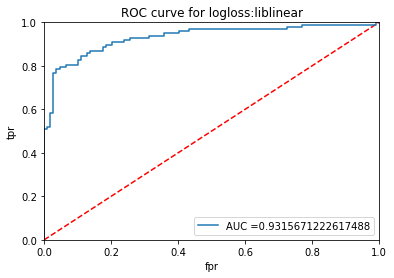

In [119]:
plt.title('ROC curve for logloss:liblinear')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr,tpr,label='AUC ='+str(roc_auc))
plt.legend(loc='best')
plt.show()